https://youtu.be/7q7E91pHoW4


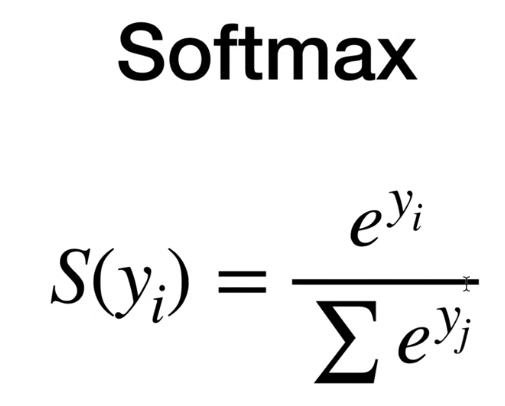<br>
Squashes output between 0 and 1<br>
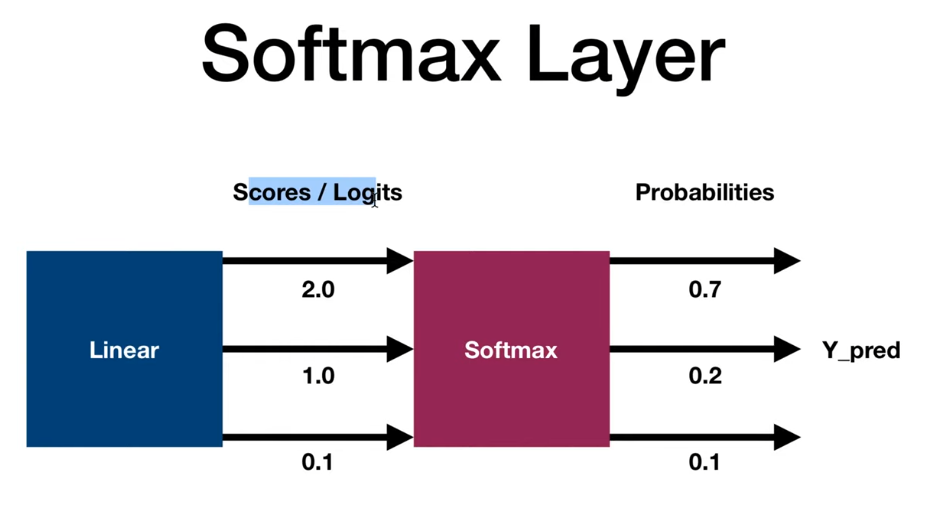<br>
Raw values is squashed into probabilities between 0 and 1<br>
The summed up probabilities are 1 as expected in probabilities<br>


In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)


x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
outputs

array([0.65900114, 0.24243297, 0.09856589])

In [3]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)  # dim=0 means sum along the column -> first axis
outputs

tensor([0.6590, 0.2424, 0.0986])

Softmax is often combined with Cross-Entropy:<br>
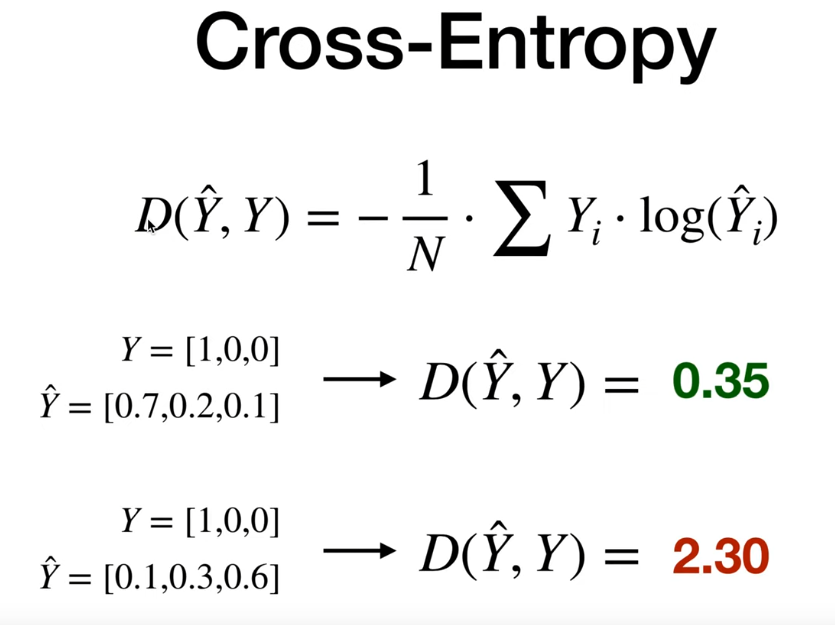<br>
The better our prediction the lower our loss.<br>
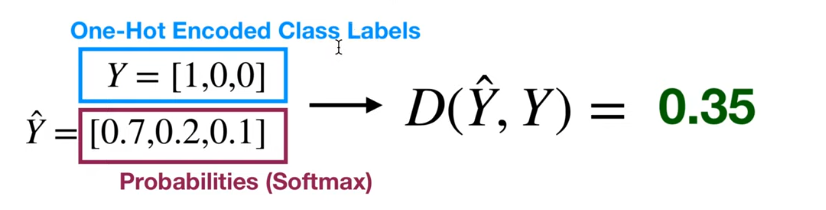<br>
Important to note that the Y needs to be one hot encoded!<br>


In [4]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss


Y = np.array([1, 0, 0])

Y_pred_good = np.array(
    [0.7, 0.2, 0.1]
)  # class 0 is predicted with high confidence 0.7 and it is correct
Y_pred_bad = np.array(
    [0.1, 0.3, 0.6]
)  # class 2 is predicted with high confidence 0.6 and it is incorrect
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
"loss1 numpy", l1, "loss2 numpy", l2

('loss1 numpy', 0.35667494393873245, 'loss2 numpy', 2.3025850929940455)

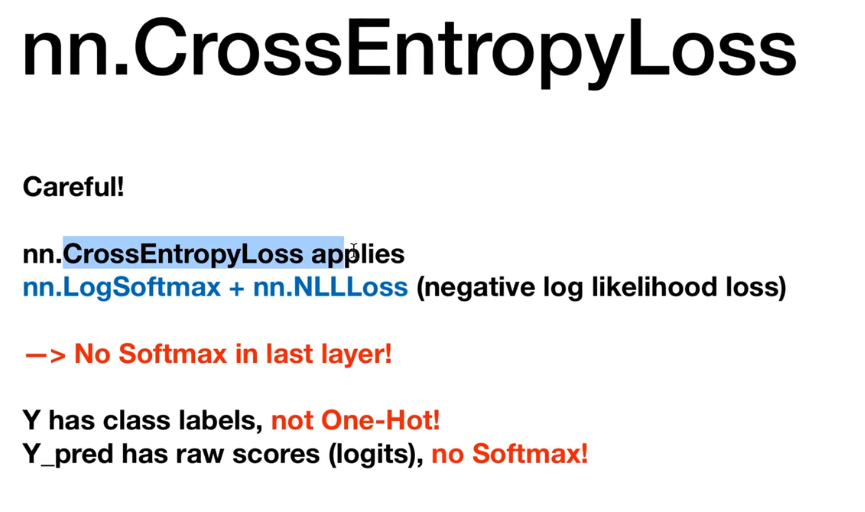<br>
LogSoftmax and NLLLoss is applied already here! (NLLLoss negative log likelihood loss)


In [5]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([0])  # only the correct calls not one hot encoded anymore
# nsamples x nclasses = 1x3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
"loss1 torch", l1.item(), "loss2 torch", l2.item()

('loss1 torch', 0.4170299470424652, 'loss2 torch', 1.840616226196289)

In [6]:
Y = torch.tensor([2, 0, 1])

Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3], [0.5, 2.0, 0.3], [0.3, 0.5, 2.0]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
"loss1 torch", l1.item(), "loss2 torch", l2.item()

('loss1 torch', 0.3018244206905365, 'loss2 torch', 1.907282829284668)

In [7]:
_, predictions1 = torch.max(
    Y_pred_good, 1
)  # choose the index with the maximum probability
_, predictions2 = torch.max(Y_pred_bad, 1)
predictions1, predictions2

(tensor([2, 0, 1]), tensor([1, 1, 2]))

Typical neural net in image classification:<br>
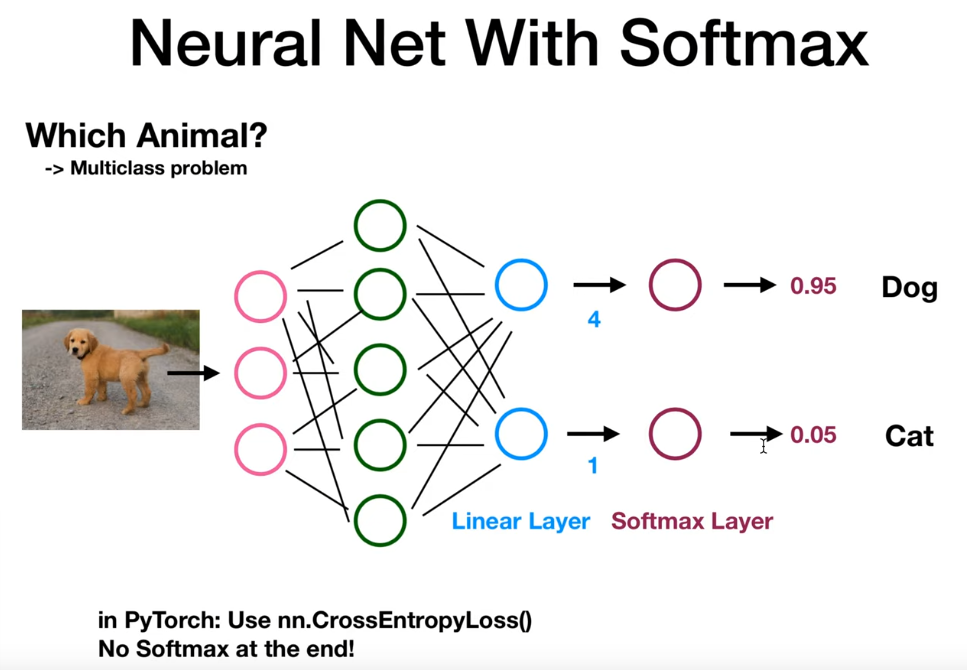<br>
No Softmax at the End as it is already included nn.CrossEntropyLoss.<br>


In [10]:
class NeuralNetMultiClassClassification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetMultiClassClassification, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no softmax at the end
        return out


model = NeuralNetMultiClassClassification(
    input_size=28 * 28, hidden_size=5, num_classes=3
)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)
model

NeuralNetMultiClassClassification(
  (l1): Linear(in_features=784, out_features=5, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=5, out_features=3, bias=True)
)

In [12]:
class NeuralNetBinaryClassification(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetBinaryClassification, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred


model = NeuralNetBinaryClassification(input_size=28 * 28, hidden_size=5)
criterion = nn.BCELoss()
model

NeuralNetBinaryClassification(
  (l1): Linear(in_features=784, out_features=5, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=5, out_features=1, bias=True)
)